# 2 Layers Fully-Connected NN

In [338]:
import torch
import torch.nn as nn
import numpy as np
import math
from random import shuffle
import matplotlib.pyplot as plt
from torch.autograd import grad
import torch.nn.functional as fun
import torch.optim as optim
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [339]:
class TwoLayersNet(nn.Module):
    def __init__(self, nX, nH, nY):        
        super(TwoLayersNet, self).__init__()     # конструктор предка с этим именем
         
        self.fc1 = nn.Linear(nX, nH)             # создаём параметры модели
        self.fc2 = nn.Linear(nH, nY)             # в полносвязных слоях
          
    def forward(self, x):                        # задаётся прямой проход
        x = self.fc1(x)                          # выход первого слоя
        x = torch.tanh(x)                     
        x = self.fc2(x)                          # выход второго слоя
        x = torch.tanh(x)                     
        return x
          

In [340]:
def train(model, x, y, num_epochs, learning_rate=0.01, random_state=3):               
    cost = []
    torch.manual_seed(random_state)
    for e in tqdm(range(num_epochs)):
        y_pred = model.forward(x.float())
        loss = fun.mse_loss(y_pred, y)
        optimizer.zero_grad()
            
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_hat = model.forward(x.float())
            curr_loss = loss
            #print('Epoch: %03d' % (e+1), end="")
            #print(' | MSE: %.5f' % curr_loss)
            cost.append(curr_loss)
    return y_pred

# Classification Problem

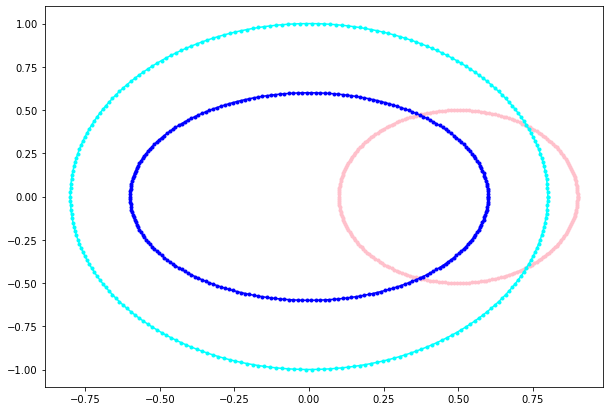

In [341]:
t=np.linspace(0,2*math.pi,int(2*math.pi/0.025))
x0=[0.5,0,0]
y0=[0,0,0]
alpha=[0,0,0]
a=[0.4,0.6,0.8]
b=[0.5,0.6,1]

def func_x1(t,a,b,alpha,x0,y0):
    return (x0+a*math.cos(t)*math.cos(alpha)+b*math.sin(t)*math.sin(alpha))
def func_x2(t,a,b,alpha,x0,y0):
    return (y0-a*math.cos(t)*math.sin(alpha)+b*math.sin(t)*math.cos(alpha))

def preparing_data(t,a,b,alpha,x0,y0):
    X_1 = np.vectorize(func_x1)(t,a,b,alpha,x0,y0)
    X_2 = np.vectorize(func_x2)(t,a,b,alpha,x0,y0)
    return [X_1,X_2]

features=[]
target=[]

for i in range(len(x0)):
    class_markers=[[1,0,0],[0,1,0],[0,0,1]]
    features.append(preparing_data(t,a[i],b[i],alpha[i],x0[i],y0[i]))
    target.append([class_markers[i]]*len(t)) 

fig, ax = plt.subplots(1, 1, figsize=(10,7))
colors=['pink','blue','cyan']
for i in range(len(features)):
    ax.plot(features[i][0],features[i][1],marker='.',color=colors[i])

plt.show()

In [342]:
indexes=range(len(features[0][0]))
subsample_inx=[]
subsample_inx.append(np.random.choice(indexes, 60, replace = False))
subsample_inx.append(np.random.choice(indexes, 100, replace = False))  
subsample_inx.append(np.random.choice(indexes, 120, replace = False))  

print(subsample_inx)

[array([103, 143, 141, 125,  91, 162, 244,  90, 231, 145, 237,  19,  69,
        85, 199,  26,  45, 190, 174, 158, 234,   6, 142,  48, 149,  12,
       208, 102,  67,  87, 220,  57, 197, 168,  46, 123, 107,  31, 193,
       137, 219, 223, 133, 196, 180, 152,  86,  43, 121, 110,  50, 222,
       111, 165,  99,   1,  25,  60, 136,  21]), array([116,  57, 144,  81, 162, 154, 219, 175, 110,  17,  98,   6,   9,
       156, 115, 145,  41, 223,  67, 189, 199, 170, 161, 113, 210, 202,
       132, 130, 225,  40, 230,  74,  52,  87,  31,  70, 125, 237,  54,
         7, 146,  60, 249, 206,  68, 129, 241, 238, 242,  26,  93,  72,
       209, 149,  96, 190,  39,   5,  84, 174, 194,  38, 227,  79, 186,
       221, 153, 167,  91,  92, 106, 124, 169, 163,  47, 127, 205, 228,
        51, 165, 131, 173, 235, 111,  88, 107,  86,  59, 139, 246, 142,
        33, 166,  25, 101, 126, 234, 243, 104, 112]), array([ 75, 190,  52, 217,  65,  62,  56, 183,  38,  17,  28,  11, 103,
       181, 180, 231,  80,  49, 

In [343]:
print(target[0][19])

[1, 0, 0]


In [344]:
subsample_features=[]
subsample_target=[]
for i in range(len(subsample_inx)):
    for x in subsample_inx[i]:
        subsample_features.append([features[i][0][x],features[i][1][x]])
        subsample_target.append(target[i][x])

In [345]:
len(subsample_features)

280

In [346]:
indexes = list(range(len(subsample_features)))

In [347]:
shuffle(indexes)
train_indexes=indexes[:int(0.7*len(indexes))]
valid_indexes=indexes[int(0.7*len(indexes)):int(0.9*len(indexes))]
test_indexes=indexes[int(0.9*len(indexes)):]

In [348]:
train_features=[]
valid_features=[]
test_features=[]
train_target = []
valid_target = []
test_target = []

for x in train_indexes:
    train_features.append(subsample_features[x])
    train_target.append(subsample_target[x])
for x in valid_indexes:
    valid_features.append(subsample_features[x])
    valid_target.append(subsample_target[x]) 
for x in test_indexes:
    test_features.append(subsample_features[x])
    test_target.append(subsample_target[x])    

In [352]:
train_features=np.array(train_features)
train_target=np.array(train_target)

valid_features=np.array(valid_features)
valid_target=np.array(valid_target)

test_features=np.array(test_features)
test_target=np.array(test_target)


(196, 2)
(56, 2)
(28, 2)


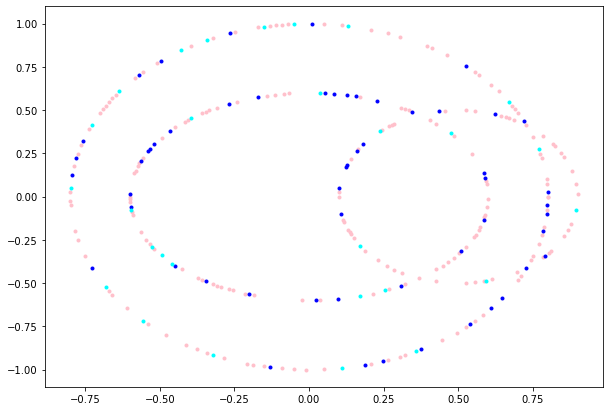

In [353]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
for i, x in enumerate([train_features, valid_features, test_features]):
    print(x.shape)
    for j in range(x.shape[0]):
        ax.plot(x[j][0],x[j][1],marker='.',color=colors[i])
        
    

In [354]:
train_features=torch.tensor(train_features).float()
train_target=torch.tensor(train_target).float()

valid_features=torch.tensor(valid_features).float()
valid_target=torch.tensor(valid_target).float()

test_features=torch.tensor(test_features).float()
test_target=torch.tensor(test_target).float()

In [355]:
model = TwoLayersNet(2, 25, 3)

In [356]:
lr=0.00001
optimizer = optim.Rprop(model.parameters(), lr=lr)

In [361]:
y_train_pred = train(model, train_features, train_target, 5000, learning_rate=0.00001, random_state=3)
print(y_train_pred.shape)

100%|██████████| 5000/5000 [00:10<00:00, 490.08it/s]

torch.Size([196, 3])


In [362]:
def right_classification(pred,target):
    right=0
    for i in range(pred.shape[0]):
        for j in range(len(pred[i])):
            if pred[i][j]>=0.5:
                pred[i][j]=1
            else:
                pred[i][j]=0  
        if torch.all(pred[i]==target[i]):
             right+=1
    print('Right classification objects:', right)

### Классификация на тренировочном

In [363]:
right_classification(y_train_pred,train_target)

Right classification objects: 188


### Классификация на валидационном и тестовом

In [364]:
y_valid_pred = model.forward(valid_features)
y_test_pred = model.forward(test_features)
right_classification(y_valid_pred,valid_target)
right_classification(y_test_pred,test_target)

Right classification objects: 51
Right classification objects: 27


### Классификация в области [-1.2,1.2]x[-1.2,1.2]

In [365]:
import itertools

h=0.025
start=-1.2
stop=1.2
x1 = np.linspace(start,stop,int((abs(start)+abs(stop))/h))
x2 = x1
grid=list(itertools.product(x1,x2))
tensor_grid=torch.empty(len(grid),len(grid[0]))
for i in range(len(grid)):
    tensor_grid[i][0]=grid[i][0]
    tensor_grid[i][1]=grid[i][1]

In [366]:
y_grid_pred = model.forward(tensor_grid)
for i in range(y_grid_pred.shape[0]):
    for j in range(len(y_grid_pred[i])):
        if y_grid_pred[i][j]>=0.5:
            y_grid_pred[i][j]=1
        else:
            y_grid_pred[i][j]=0


In [367]:
colormap=[]
for i in range(y_grid_pred.shape[0]):
    if torch.all(y_grid_pred[i]==torch.tensor([1,0,0])):
        colormap.append('blue')
    elif torch.all(y_grid_pred[i]==torch.tensor([0,1,0])):
        colormap.append('cyan')
    else:
        colormap.append('pink')

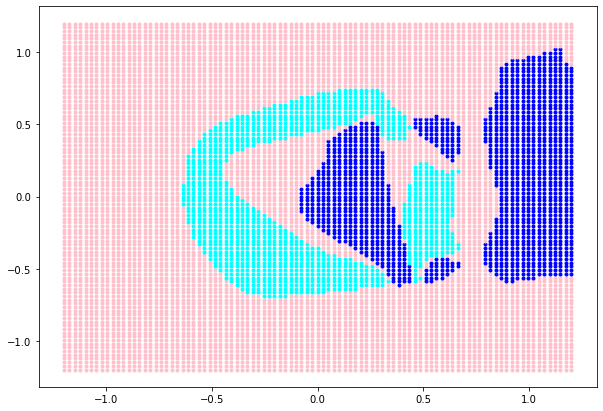

In [368]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
for i in range(len(grid)):
    ax.plot(grid[i][0],grid[i][1],marker='.',color=colormap[i])

plt.show()

## Approximation Problem

In [34]:
step=0.025
t=np.linspace(0,5,int(5/step))
y=np.sin(0.66*math.pi*t)

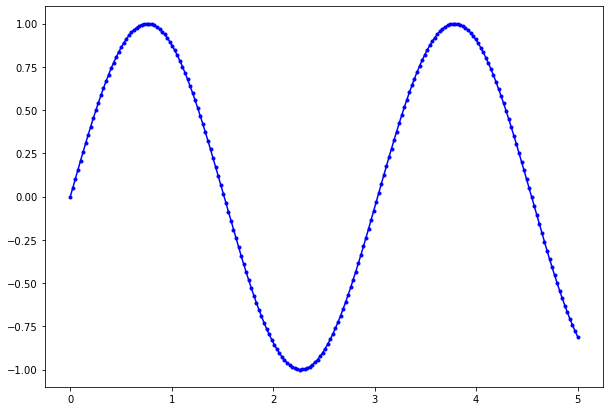

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(t,y,marker='.',color='blue')
plt.show()

In [36]:
train_features = np.array(t[:180])
train_target = np.array(y[:180])

valid_features = np.array(t[180:])
valid_target = np.array(y[180:])

In [37]:
train_features= train_features.reshape(train_features.shape[0],1)
train_target=train_target.reshape(train_target.shape[0],1)
valid_features=valid_features.reshape(valid_features.shape[0],1)
valid_target=valid_target.reshape(valid_target.shape[0],1)

In [38]:
!pip install neurolab

In [39]:
import neurolab as nl


**Multilayer feed forward perceptron**
* create function: neurolab.net.newff()
* default train function: neurolab.train.train_gdx()
* support train functions: train_gd, train_gda, train_gdm, train_rprop, train_bfgs, train_cg


## **1. Train gdx method**

<div style="border:solid #8A2BE2 2px; padding: 40px">
Функция обновляет значения веса и смещения в соответствии с импульсом градиентного спуска и адаптивной скоростью обучения.
Обратное распространение используется для вычисления производных функции потерь относительно переменных веса и смещения X. Каждая переменная корректируется с использованием градиентного спуска и импульса,

**dX = mc * dXprev + lr * mc * dloss/dX**

где **dXprev** -  предыдущее изменение веса или смещения.

Для каждой эпохи, если производительность снижается по направлению к цели, то скорость обучения увеличивается на коэффициент *lr_inc*. Если производительность увеличивается более чем на коэффициент *max_perf_inc*, скорость обучения корректируется на коэффициент *lr_dec* и изменение, повысившее производительность, не производится.

**Обучение прекращается при возникновении любого из следующих условий:**

* epochs - Достигнуто максимальное количество (повторений).
* Превышено максимальное время .
* Достигнут критерий остановки функции потерь goal.
* Градиент функции потерь ниже mingrad.
* Потеря на валидационном множестве увеличилась более чем в max_fail раз с момента последнего снижения (при использовании валидации)

In [40]:
net = nl.net.newff([[0, 5]],[20,1])

error = net.train(train_features, train_target, epochs=600, goal=10**(-8))
output = net.sim(train_features)

Epoch: 100; Error: 0.12327699941982494;
Epoch: 200; Error: 0.022811375172837406;
Epoch: 300; Error: 0.006212263890982754;
Epoch: 400; Error: 0.005118560900272576;
Epoch: 500; Error: 0.004047956776450858;
Epoch: 600; Error: 0.0037064576994157382;
The maximum number of train epochs is reached


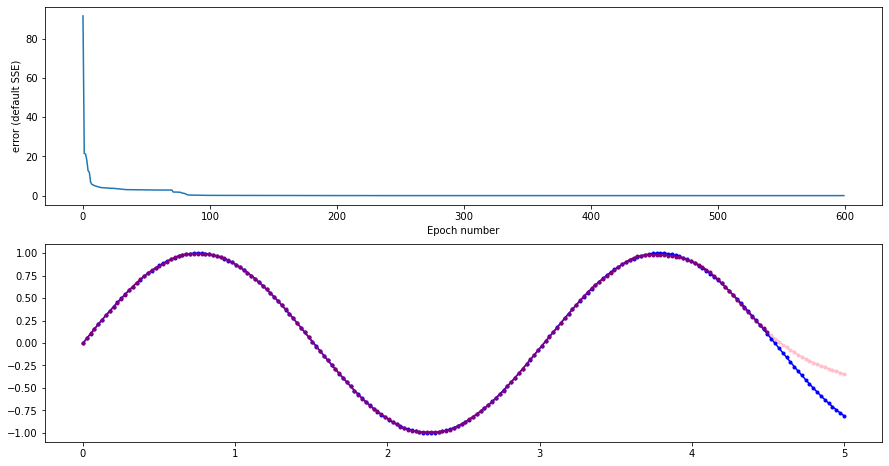

In [41]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(error)
ax[0].set_xlabel('Epoch number')
ax[0].set_ylabel('error (default SSE)')

t2 = valid_features
y2 = net.sim(valid_features).reshape(valid_features.size)

y3 = output.reshape(train_features.size)

ax[1].plot(t2, y2, marker='.',color='pink')
ax[1].plot(t,y,marker='.',color='blue')
ax[1].plot(t[:180],y3,marker='.',color='purple')

plt.show()

## **2. Train bfgs method**

<div style="border:solid #8A2BE2 2px; padding: 40px">
Пусть задана некоторая функция $f(x, y)$ и мы решаем задачу оптимизации: $min f(x, y)$.
Где в общем случае $f(x, y)$ является не выпуклой функцией, которая имеет непрерывные вторые производные.

**Шаг №1**

* Инициализируем начальную точку $x_0$;
* Задаем точность поиска $ε$ > 0;
* Определяем начальное приближение $H_0 = B_0^{-1}$, где $B_0^{-1}$ — обратный гессиан функции

В качестве начального приближения $H_0$ можно взять гессиан функции, вычисленный в начальной точке $x_0$. Иначе можно использовать хорошо обусловленную, невырожденную матрицу, на практике часто берут единичную матрицу.

**Шаг №2**

Находим точку, в направлении которой будем производить поиск, она определяется следующим образом:
$p_k = -H_k* \nabla f_k$



**Шаг №3**

* Вычисляем $x_{k+1}$ через рекуррентное соотношение:
$x_{k+1} = x_k + α_k * p_k$


* Коэффициент $α_k$ находим используя линейный поиск (line search), где $α_k$ удовлетворяет условиям Вольфе (Wolfe conditions):
$f(x_k + α_k * p_k) \leq f(x_k) + c_1 * α_k * \nabla f_k^T *p_k$


* $\nabla f(x_k + α_k * p_k)^T * p_k \geq c_2 * \nabla f_k^T * p_k$


Константы $с_1$ и $с_2$ выбирают следующим образом: $0 \leq c_1 \leq c_2 \leq 1$. В большинстве реализаций: $c_1 = 0.0001$ и $с_2 = 0.9$.
Фактически мы находим такое $α_k$ при котором значение функции $f(x_k + α_k * p_k)$ минимально.

**Шаг №4**

* Определяем вектора:
$s_k = x_{k+1} - x_k$


* $y_k = \nabla f_{k+1} - \nabla f_k$


$s_k$ — шаг алгоритма на итерации, $y_k$ — изменение градиента на итерации.

**Шаг №5**

* Обновляем гессиан функции, согласно следующей формуле:
$H_{k+1} = (I - ρ_k * s_k * y_k^T)H_k(I - ρ_k * y_k * s_k^T) + ρ * s_k * s_k^T$


где $ρ_k$
$ρ_k = \frac {1}{y_k^T s_k}$, $I$ — единичная матрица.


**Шаг №6**

* Алгоритм продолжает выполнятся до тех пор пока истинно неравенство: $|\nabla f_k| > ε$.


In [42]:
net = nl.net.newff([[0, 5]],[20,1])

error = nl.train.train_bfgs(net,train_features, train_target, epochs=600, goal=10**(-8))
output = net.sim(train_features)

Epoch: 100; Error: 2.738153815166398;
Epoch: 200; Error: 1.5023178265868615;
Epoch: 300; Error: 1.4949741648286143;
Epoch: 400; Error: 1.4919316177695585;
Epoch: 500; Error: 0.044089330903098314;
Epoch: 600; Error: 0.02914825251053421;
The maximum number of train epochs is reached


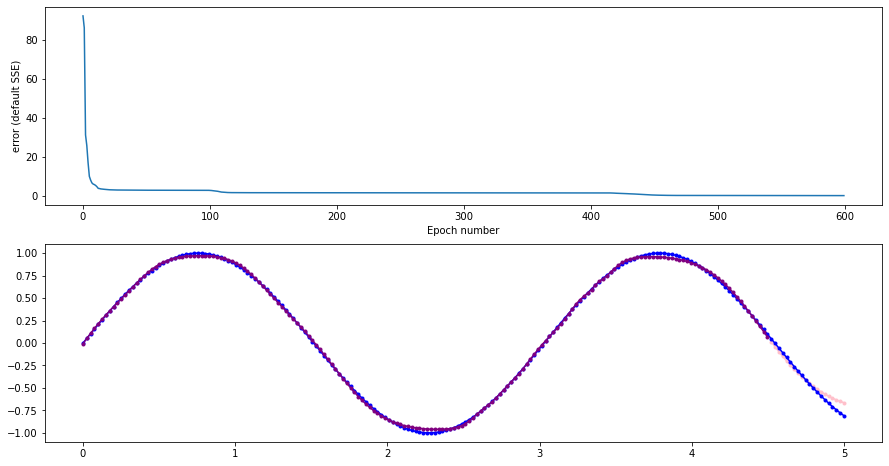

In [43]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(error)
ax[0].set_xlabel('Epoch number')
ax[0].set_ylabel('error (default SSE)')

t2 = valid_features
y2 = net.sim(valid_features).reshape(valid_features.size)

y3 = output.reshape(train_features.size)

ax[1].plot(t2, y2, marker='.',color='pink')
ax[1].plot(t,y,marker='.',color='blue')
ax[1].plot(t[:180],y3,marker='.',color='purple')

plt.show()